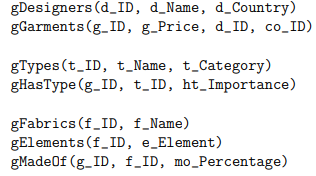

In [ ]:
select count(*)
from gGarments
where g_price is null;

In [ ]:
select count(distinct G.d_Id)
from gElements E
join gMadeOf MO 
    on E.f_Id = MO.f_Id 
    and E.e_Element = 'Procrastinium'
    and MO.mo_Percentage > 25
join gGarments G 
    on G.g_Id = MO.g_Id;

In [6]:
select count(distinct d_Id) from (
    select distinct d_Id
    from gGarments
    where co_Id is null
    except 
    select distinct d_Id
    from gGarments
    where co_Id is not null
) loners;


(1 row(s) affected)

Total execution time: 00:00:00.009

count
2170


In [ ]:
select d_Id 
from gGarments 
group by d_Id
having avg(g_Price) = (select max(xbar) from ( 
        select avg(g_Price) as xbar
        from gGarments
        group by d_Id
    ) A
);

In [ ]:
select count(f_Id)
from gFabrics
where f_Name like 'c%'
    and f_Id in (
        select f_Id
        from gGarments
        group by f_Id
        having count(g_Id) >= 5
    );


In [ ]:
select count(*) from (
    select g_Id
    from gMadeOf
    group by g_Id
    having sum(mo_Percentage) <> 100
) A;

In [ ]:
select count(*) from (
    select G.d_Id
    from gGarments G
    join gHasType HT
        on G.g_Id = HT.g_Id
    join gTypes T 
        on HT.t_Id = T.t_Id
        and T.t_Category = 'Dress'
    group by G.d_Id
        having count(distinct T.t_Name) = (
            select count(*)
            from gTypes
            where t_Category = 'Dress'
        )
) A;

In [ ]:
create or replace view DesignerCountryCollabs as 
select a as d_Id, count(distinct D.d_Country) as count from
(
    select d_id as a,co_id as b
    from gGarments
    where d_id is not null and co_id is not null
    union 
    select co_id as a,d_id as b
    from gGarments
    where co_id is not null and co_id is not null
) A
join gDesigners D 
    on A.b = D.d_id 
group by (a);

select d_Id
from DesignerCountryCollabs 
where count = (select max(count) from DesignerCountryCollabs);